## Exercise 7.1
- Load the image and detect edges in it. Here the function cv2.Canny can be used. Visualize the edges you have detected.

In [1]:
import cv2
path = "../Data/week06_data/Box3.bmp"
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

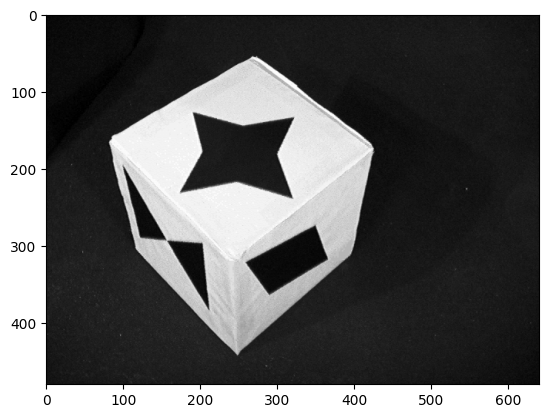

In [2]:
import matplotlib.pyplot as plt 

plt.imshow(img, cmap="gray")


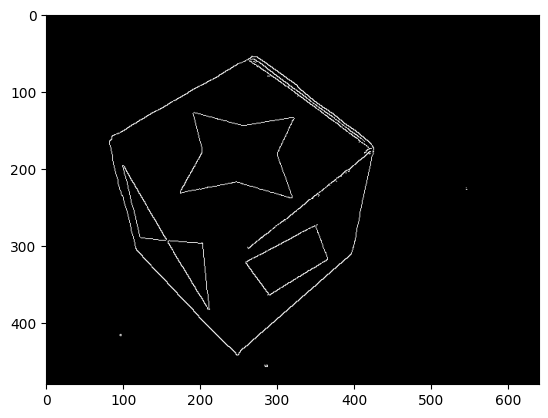

In [3]:
edges = cv2.Canny(img,55,300)
plt.imshow(edges,cmap="gray")

## Exercise 7.2
####  Compute the Hough space from the detected edges. Use the function
### hspace, angles, dists = skimage.transform.hough_line(edges)
### What do the returned values hspace, angles, dists mean?

In [4]:
import skimage 


hspace, angles, dists = skimage.transform.hough_line(edges)

## Exercise 7.3
### Visualize the Hough space. To get the correct units on the axes you can use extent = [angles[0], angles[-1], dists[-1], dists[0]]
### plt.imshow(hspace, extent=extent, aspect='auto')

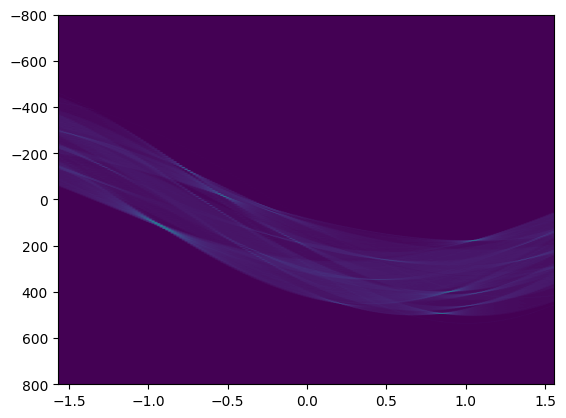

In [5]:
extent = [angles[0], angles[-1], dists[-1], dists[0]] 

plt.imshow(hspace,extent=extent,aspect="auto")

# Exercise 7.4

####  Find peaks in your Hough space, using skimage.transform.hough_line_peaks. extH, extAngles, extDists = hough_line_peaks(hspace, angles, dists, num_peaks=n)
#### Display your identified peaks on top of the Hough space.

In [6]:
n= 5
extH, extAngles, extDists =  skimage.transform.hough_line_peaks(hspace, angles, dists, num_peaks=n)

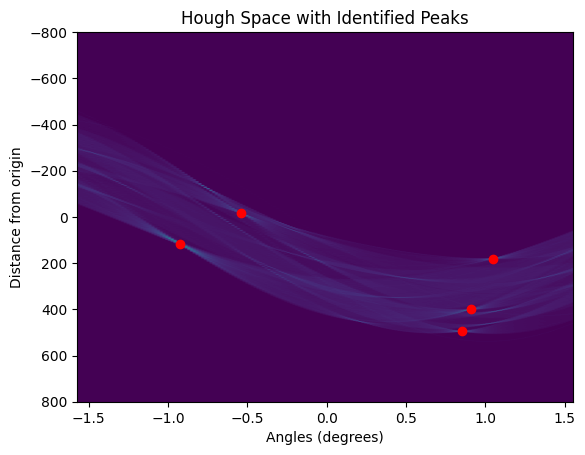

In [7]:
import numpy as np 

extH, extAngles, extDists =  skimage.transform.hough_line_peaks(hspace, angles, dists, num_peaks=n)

plt.imshow(hspace, extent=extent, aspect='auto')
plt.scatter((extAngles), extDists, color='red')
plt.title('Hough Space with Identified Peaks')
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance from origin')
plt.show()

## 7.5 



In [8]:
def DrawLine(l, shape):
    #Checks where the line intersects the four sides of the image
    # and finds the two intersections that are within the frame
    def in_frame(l_im): 
        q = np.cross(l.flatten(), l_im)
        q = q[:2]/q[2]
        if all(q>=0) and all(q+1<=shape[1::-1]):
          return q
    lines = [[1, 0, 0], [0, 1, 0], [1, 0, 1-shape[1]], [0, 1, 1-shape[0]]]
    P = [in_frame(l_im) for l_im in lines if in_frame(l_im) is not None]
    if (len(P)==0):
        print("Line is completely outside image")
    plt.plot(*np.array(P).T)




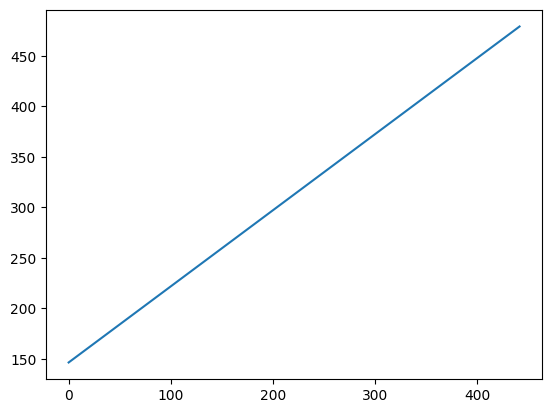

In [9]:
lines = [[np.cos(theta),np.sin(theta),r] for theta,r in zip(extAngles,extDists)]

DrawLine(np.array(lines[4]),img.shape)



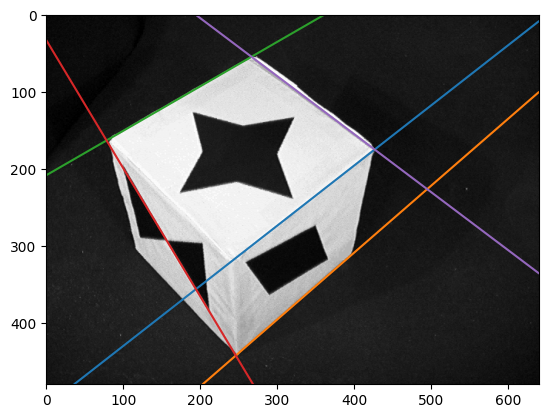

In [10]:
for theta, r in zip(extAngles, extDists):
    # Convert polar coordinates to two points on the line
    x1 = 0
    y1 = (r - x1 * np.cos(theta)) / np.sin(theta)
    x2 = img.shape[1]
    y2 = (r - x2 * np.cos(theta)) / np.sin(theta)
    
    line = np.cross([x1, y1, 1], [x2, y2, 1])
    
    # Draw the line
    DrawLine(line, img.shape)
    
plt.imshow(img, cmap='gray')
plt.show()

## Make a function that fits a line, in homogeneous coordinates, given two points.

In [11]:

def test_points(n_in, n_out):

    a = (np.random.rand(n_in)-.5)*10
    b = np.vstack((a, a*.5+np.random.randn(n_in)*.25))
    points = np.hstack((b, 2*np.random.randn(2, n_out)))
    return np.random.permutation(points.T).T



def normalize_line(l): 
    norm = np.sqrt(l[0]**2+l[1]**2) 
    return l/norm 
    


def fit_a_line(p1,p2):

    
    l = np.cross(PiInv(p1),PiInv(p2)) 
    l = normalize_line(l)
    
    return l



In [12]:
from some import *

add_project_root_to_path()

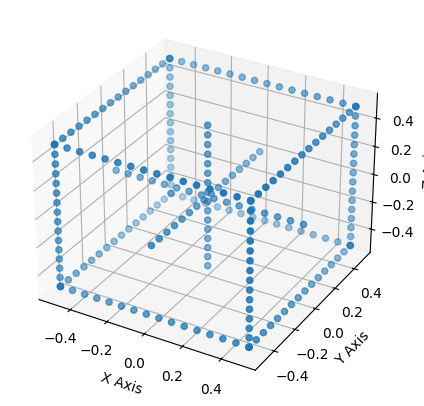

In [13]:
from utils.week1 import *

## Exercise 7.7
####  Make a function that determines which of a set of 2D points are an inliers or outliers with respect to a given line. The threshold should be supplied as parameter to this function, such that it can easily be tuned later

In [321]:
def detect_inlier(l,thresh,points):

    inliers = []
    outliers = []
    for point in points.T:

        dist = np.abs(l @ PiInv(point))
        
        if dist<thresh:
            inliers.append(point)
        else:
            outliers.append(point)

    return inliers,outliers


## Exercise 7.8
####  Make a function that calculates the consensus, i.e. the number of inliers, for a line with respect to a set of points

In [326]:
def calculate_consensus(points,l,thresh):
    inliers,outliers = detect_inlier(l,thresh,points)

    return len(inliers),inliers


## Exercise 7.9
### Make a function that randomly samples two of n 2D points (without replacement).

In [16]:
import numpy as np


def sample_two_points(points):
    """
    Randomly samples points from a given 2xN NumPy array without replacement,
    and returns them as a list of tuples, each tuple containing two points as lists (x, y).
    
    Parameters:
    - points: A 2xN NumPy array where the first row contains x-coordinates and the second row contains y-coordinates.
    
    Returns:
    - A list of tuples, each tuple containing two randomly sampled points without replacement.
      Each point is represented as a list of [x, y].
    """
    N = points.shape[1]  # Total number of points
    # Shuffle indices to sample without replacement
    shuffled_indices = np.random.permutation(N)
    # Initialize an empty list to store the point pairs
    point_pairs = []
    
    # Iterate through shuffled indices in steps of 2
    for i in range(0, N - 1, 2):
        point1 = [points[0, shuffled_indices[i]], points[1, shuffled_indices[i]]]
        point2 = [points[0, shuffled_indices[i + 1]], points[1, shuffled_indices[i + 1]]]
        point_pairs.append((point1, point2))

    return point_pairs






## Exercise 7.10
#### Assemble the functions made above to a working RANSAC algorithm for estimating lines. Set the number of iterations and the threshold manually.

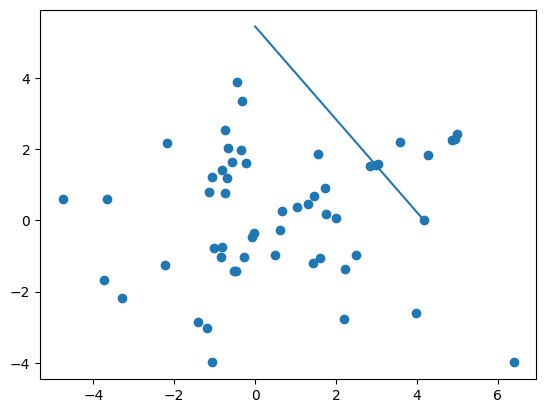

In [110]:
def RANSAC(points,threshold,N):


    best_line = None 
    best_cons = 0
    samples = sample_two_points(points) 

    for i in range(N):
        
        


        # Random sample 
        S = samples[i]
        p1 = np.array(S[0]) 
        p2 = np.array(S[1])

        # Estimate model 
        l = fit_a_line(p1,p2)

        # Consensus 
        cons = calculate_consensus(points,l,thresh=threshold)
        
    

        if cons>=best_cons:
            best_line = l 
        
        

    return best_line

test_p = test_points(10,45)

l = RANSAC(test_p,0.35,6)
plt.scatter(test_p[0],test_p[1])
DrawLine(l,(50,50))

### Exercise 7.11
##### Experiment with the algorithm, what is a good threshold for distinguishing between inliers and outliers?

## Exercise 7.12 

In [462]:
def pca_line(x): # assumes x is a (2 x n) array of points
    d = np.cov(x)[:, 0]
    d /= np.linalg.norm(d)
    l = [d[1], -d[0]]
    l.append(-(l@x.mean(1)))
    return l




def RANSAC(points, threshold):
    best_line = None
    best_cons = 0
    best_inliers = []
    # Random sample
    samples = sample_two_points(points)
    N = 0
    M = points.shape[1]
    p = 0.99
    i = 0

    while True:

        if i>=M/2 -1:
            samples = sample_two_points(points)
            i = 0

 
        # Estimate model
        S = samples[i]
        p1 = np.array(S[0])
        p2 = np.array(S[1])
        l = (fit_a_line(p1.T, p2.T))
        # Consensus
        cons,inliers = calculate_consensus(points, l, thresh=threshold)
        
        if cons > best_cons:
            print("Number of inliers: {}".format(cons))

            best_cons = cons
            best_line = l
            best_inliers = inliers

        epsilon_hat = 1 - (cons/M)
        N_hat = np.log(1-p) / (np.log((1-(1-epsilon_hat)**2)))
        if N_hat < N :
            break
    
        N+=1 
        i+=1


    # Fit a new line to all inliers of the best line
    inlier_points = inliers
    best_line = pca_line(np.array(inlier_points).T)

    return best_line



In [400]:
test_p = test_points(97,90)
l= RANSAC(test_p,0.15)
l

Number of inliers: 8
Number of inliers: 23
Number of inliers: 52
Number of inliers: 57


[0.43751779970532073, -0.8992097502479691, -0.014627486387281556]

In [455]:
test_p = test_points(25,90) 


93

Number of inliers: 6
Number of inliers: 10
Number of inliers: 18


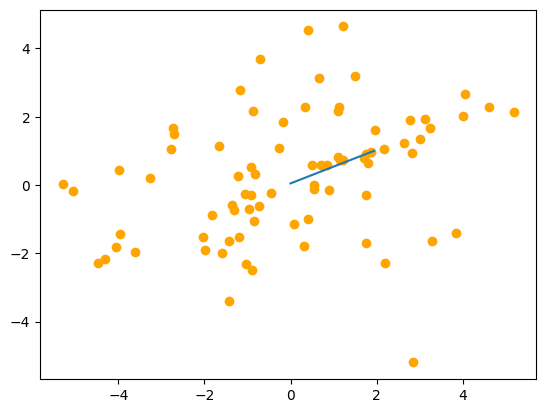

In [465]:
test_p = test_points(25,54) 

l= RANSAC(test_p,0.15)
l

plt.scatter(test_p[0],test_p[1],color="orange")
DrawLine(np.array(l),test_p.shape)

In [451]:
test_p[2]

IndexError: index 2 is out of bounds for axis 0 with size 2

## Question 1 (1 point) 
 
Load the file ransac.npy

np.load("ransac.npy", allow_pickle=True).item()

You are fitting a straight line to a set of 2D points (points) with RANSAC.
In the current iteration you fit the line through x1 and x2.
You set the threshold to

How many points are inliers in the current iteration?



In [405]:
data = np.load("../Data/ransac.npy", allow_pickle=True).item()

points = data['points']
x1 = data['x1']
x2 = data['x2']



l = fit_a_line(x1,x2)
cons,inliers = calculate_consensus(points, l, thresh=0.2)
cons

34

## Question 2 (1 point) 
We are using RANSAC to estimate a homography matrix.
At iteration number 191 we find a model where 103 out of 404
point matches are inliers, which is the highest number of inliers
we have observed so far.

Given the current information, what is the smallest number of iterations we need to run in total in order to be 95% sure that we will have fitted at least one model to only inliers?



In [436]:
m = 404 
s = 103   
epsilon_hat = 1 -( s/m )

N = np.log(1-0.95) / (np.log((1-(1-epsilon_hat)**4)))
iterations =  (N) 

print("The smallest number of iterations we need ot run in total: {}".format(iterations))

The smallest number of iterations we need ot run in total: 707.5554825030302


In [424]:
191 - N

122.47933614258368